# Cleaning of RequestForPayment.xes

In [1]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the XES file and convert it to a DataFrame
xes_filename = '../datasets/RequestForPayment.xes'
log = pm4py.read_xes(xes_filename)
df = pm4py.convert_to_dataframe(log)

df

parsing log, completed traces ::   0%|          | 0/6886 [00:00<?, ?it/s]

,id,org:resource,concept:name,time:timestamp,org:role,case:Rfp_id,case:Project,case:Task,case:concept:name,case:OrganizationalEntity,case:Cost Type,case:RequestedAmount,case:Activity,case:RfpNumber
0,st_step 148220_0,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,2017-01-09 09:17:18+00:00,EMPLOYEE,request for payment 148214,project 148216,UNKNOWN,request for payment 148214,organizational unit 65463,0,34.336343,UNKNOWN,request for payment number 148215
1,st_step 148221_0,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,2017-01-09 09:18:00+00:00,SUPERVISOR,request for payment 148214,project 148216,UNKNOWN,request for payment 148214,organizational unit 65463,0,34.336343,UNKNOWN,request for payment number 148215
2,st_step 148222_0,STAFF MEMBER,Request For Payment REJECTED by MISSING,2017-01-10 12:42:32+00:00,MISSING,request for payment 148214,project 148216,UNKNOWN,request for payment 148214,organizational unit 65463,0,34.336343,UNKNOWN,request for payment number 148215
3,st_step 148219_0,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,2017-03-03 09:51:13+00:00,EMPLOYEE,request for payment 148214,project 148216,UNKNOWN,request for payment 148214,organizational unit 65463,0,34.336343,UNKNOWN,request for payment number 148215
4,st_step 148218_0,STAFF MEMBER,Request For Payment APPROVED by PRE_APPROVER,2017-03-03 09:51:42+00:00,PRE_APPROVER,request for payment 148214,project 148216,UNKNOWN,request for payment 148214,organizational unit 65463,0,34.336343,UNKNOWN,request for payment number 148215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36791,st_step 185004_0,STAFF MEMBER,Request For Payment APPROVED by ADMINISTRATION,2018-12-29 12:35:02+00:00,ADMINISTRATION,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001
36792,st_step 185003_0,STAFF MEMBER,Request For Payment APPROVED by BUDGET OWNER,2019-01-03 09:27:20+00:00,BUDGET OWNER,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001
36793,st_step 185005_0,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,2019-01-08 09:00:39+00:00,SUPERVISOR,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001
36794,rp_request for payment 185000_15,SYSTEM,Request Payment,2019-01-08 09:29:14+00:00,UNDEFINED,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001


In [3]:
# Rename the column
df = df.rename(columns={'case:Rfp_id': 'case:id'})

# Convert the 'case:id' column to string type
df['case:id'] = df['case:id'].astype(str)

In [4]:
# Display the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36796 entries, 0 to 36795
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   id                         36796 non-null  object             
 1   org:resource               36796 non-null  object             
 2   concept:name               36796 non-null  object             
 3   time:timestamp             36796 non-null  datetime64[ns, UTC]
 4   org:role                   36796 non-null  object             
 5   case:id                    36796 non-null  object             
 6   case:Project               36796 non-null  object             
 7   case:Task                  36796 non-null  object             
 8   case:concept:name          36796 non-null  object             
 9   case:OrganizationalEntity  36796 non-null  object             
 10  case:Cost Type             36796 non-null  int64              
 11  ca

In [5]:
# List the columns in the DataFrame
df.columns

Index(['id', 'org:resource', 'concept:name', 'time:timestamp', 'org:role',
       'case:id', 'case:Project', 'case:Task', 'case:concept:name',
       'case:OrganizationalEntity', 'case:Cost Type', 'case:RequestedAmount',
       'case:Activity', 'case:RfpNumber'],
      dtype='object')

In [6]:
# Compute frequency of activities
activity_counts = df["concept:name"].value_counts()
print("Frequency of Activities:\n", activity_counts)
print(type(activity_counts))

Frequency of Activities:
 concept:name
Request For Payment SUBMITTED by EMPLOYEE             7504
Request For Payment FINAL_APPROVED by SUPERVISOR      6343
Payment Handled                                       6307
Request Payment                                       6303
Request For Payment APPROVED by ADMINISTRATION        5489
Request For Payment APPROVED by BUDGET OWNER          2014
Request For Payment REJECTED by EMPLOYEE              1085
Request For Payment REJECTED by ADMINISTRATION         836
Request For Payment APPROVED by PRE_APPROVER           413
Request For Payment REJECTED by SUPERVISOR             179
Request For Payment SAVED by EMPLOYEE                   74
Request For Payment REJECTED by MISSING                 66
Request For Payment REJECTED by PRE_APPROVER            51
Request For Payment REJECTED by BUDGET OWNER            47
Request For Payment FINAL_APPROVED by DIRECTOR          41
Request For Payment APPROVED by SUPERVISOR              41
Request For Payme

In [7]:
#Count unique case:id values
unique_case_ids = df['case:id'].nunique()

print(f"Number of unique case id: {unique_case_ids}")

Number of unique case id: 6886


In [8]:
# Check for NaN values across all columns
nan_counts = df.isnull().sum()

# Display only columns that have NaN values
print("Count of NaN values per column:")
print(nan_counts[nan_counts > 0]) 

if nan_counts.sum() == 0:
    print("\nNo NaN values found in the DataFrame.")
else:
    print(f"\nTotal NaN values found: {nan_counts.sum()}")

Count of NaN values per column:
Series([], dtype: int64)

No NaN values found in the DataFrame.


In [9]:
# Count the unknown activities
unknwon_count = df['case:Activity'].astype(str).str.contains('UNKNOWN').sum()

# Calculate the percentage of unknown activities
percentage_unknown = (unknwon_count / len(df)) * 100

print(f"Found {unknwon_count} UNKNOWN actvities, {percentage_unknown:.2f}% of total rows")

Found 26643 UNKNOWN actvities, 72.41% of total rows


In [10]:
# Get counts of each unique value in 'case:Activity'
activity_counts = df['case:Activity'].value_counts()

# Get percentages of each unique value in 'case:Activity'
activity_percentages = df['case:Activity'].value_counts(normalize=True) * 100

# Combine them
combined_activity_info = pd.DataFrame({
    'Count': activity_counts,
    'Percentage': activity_percentages
})

print("Counts and Percentages of each unique value in 'case:Activity':")
print(combined_activity_info)

Counts and Percentages of each unique value in 'case:Activity':
                 Count  Percentage
case:Activity                     
UNKNOWN          26643   72.407327
activity 505     10112   27.481248
activity 13776      22    0.059789
activity 21016       8    0.021741
activity 181118      6    0.016306
activity 167406      5    0.013588


In [ ]:
# Get and display the variants

variants = pm4py.get_variants(
    df,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

print(variants)

{('Request For Payment SUBMITTED by EMPLOYEE', 'Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Handled'): 583, ('Request For Payment SUBMITTED by EMPLOYEE', 'Request For Payment APPROVED by PRE_APPROVER', 'Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Handled'): 340, ('Request For Payment SUBMITTED by EMPLOYEE', 'Request For Payment REJECTED by PRE_APPROVER', 'Request For Payment REJECTED by EMPLOYEE', 'Request For Payment SUBMITTED by EMPLOYEE', 'Request For Payment APPROVED by PRE_APPROVER', 'Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Handled'): 24, ('Request For Payment SUBMITTED by EMPLOYEE', 'Request For Payment REJECTED by SUPERVISOR', 'Request For Payment REJECTED by EMPLOYEE'): 18, ('Request For Payment SUBMITTED by EMPLOYEE', 'Request For Payment APPROVED by PRE_APPROVER', 'Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request For Payment REJECTED by MISSING', 'Request Fo

In [ ]:
# Also for variants, but provides a batter overview of the variants and their frequencies

variants_df = pm4py.get_variants_paths_duration(
    df,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

variants_df

,@@index_in_trace,@@flow_time,@@cumulative_occ_path_column,concept:name,concept:name_2,@@variant_column,@@variant_count
0,0,5.565799e+04,0,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment APPROVED by ADMINISTRATION,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",3011
1,1,2.424811e+05,0,Request For Payment APPROVED by ADMINISTRATION,Request For Payment FINAL_APPROVED by SUPERVISOR,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",3011
2,2,2.731104e+05,0,Request For Payment FINAL_APPROVED by SUPERVISOR,Request Payment,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",3011
3,3,2.977582e+05,0,Request Payment,Payment Handled,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",3011
0,0,9.488335e+04,0,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment APPROVED by ADMINISTRATION,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",1762
...,...,...,...,...,...,...,...
4,4,2.142856e+06,0,Payment Handled,Request Payment,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",1
0,0,2.000000e+01,0,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment APPROVED by ADMINISTRATION,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",1
1,1,2.219370e+05,0,Request For Payment APPROVED by ADMINISTRATION,Request For Payment APPROVED by BUDGET OWNER,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",1
2,2,5.912890e+05,0,Request For Payment APPROVED by BUDGET OWNER,Request For Payment FINAL_APPROVED by SUPERVISOR,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",1


In [ ]:
# Dataframe with sorting of the variants
variants = variants_df.groupby('@@variant_column').agg({'@@variant_count': 'first'}).reset_index()

# Sorting the DataFrame by '@@variant_count' column in descending order
variants = variants.sort_values(by='@@variant_count', ascending=False).reset_index(drop=True) # This resets the index after sorting. drop=True ensures the old index is not added as a new column.

variants

,@@variant_column,@@variant_count
0,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",3011
1,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",1762
2,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",583
3,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",343
4,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",340
...,...,...
83,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",1
84,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",1
85,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",1
86,"(Request For Payment SUBMITTED by EMPLOYEE, Re...",1


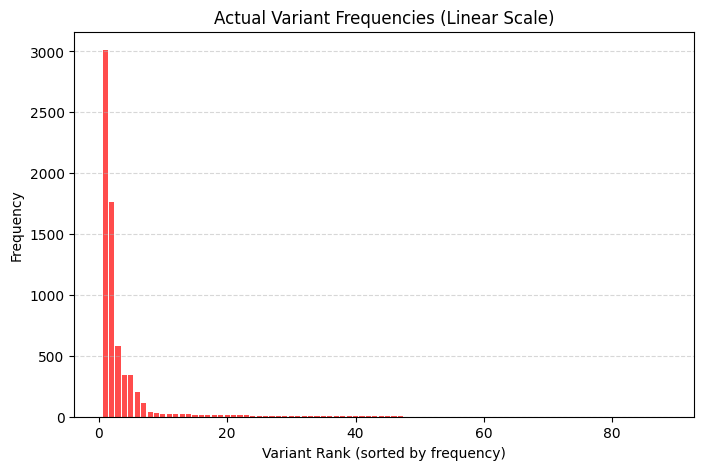

In [14]:
# Create a variable for the distribution 
distribution = variants['@@variant_count']

# Raw Frequency Plot (Linear Scale)
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(distribution)+1), distribution, color='red', alpha=0.7)
plt.title("Actual Variant Frequencies (Linear Scale)")
plt.xlabel("Variant Rank (sorted by frequency)")
plt.ylabel("Frequency")
plt.grid(True, axis='y', ls="--", alpha=0.5)
plt.show()

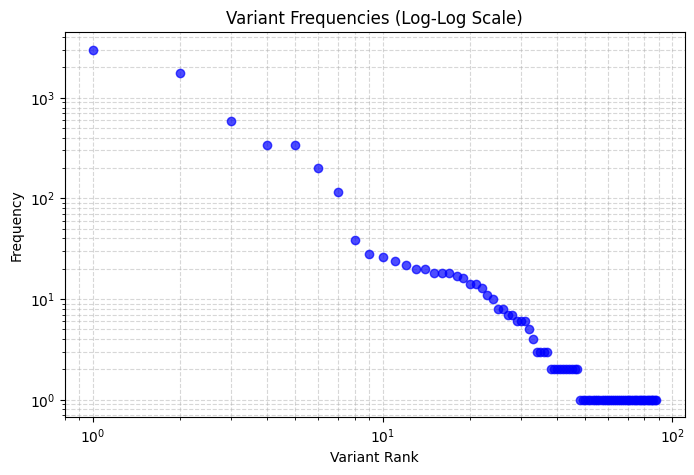

In [15]:
# Log-Log Plot
plt.figure(figsize=(8, 5))
plt.loglog(range(1, len(distribution)+1), distribution, 'bo', alpha=0.7)
plt.title("Variant Frequencies (Log-Log Scale)")
plt.xlabel("Variant Rank")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

In [ ]:
# Display the top N variants
top_n = 5
print(top_n, " more frequent variants")
print(variants.head(top_n))

# Evaluate the coverage of the top N variants
total_cases = variants['@@variant_count'].sum()
cases_in_top_n = variants['@@variant_count'].head(top_n).sum()
percentage_coverage = (cases_in_top_n / total_cases) * 100
print(f"\nTop {top_n} variants cover {percentage_coverage:.2f}% of total cases")

5  more frequent variants
                                    @@variant_column  @@variant_count
0  (Request For Payment SUBMITTED by EMPLOYEE, Re...             3011
1  (Request For Payment SUBMITTED by EMPLOYEE, Re...             1762
2  (Request For Payment SUBMITTED by EMPLOYEE, Re...              583
3  (Request For Payment SUBMITTED by EMPLOYEE, Re...              343
4  (Request For Payment SUBMITTED by EMPLOYEE, Re...              340

Top 5 variants cover 88.63% of total cases


In [17]:
# Top k variants

filtered_df = pm4py.filter_variants_top_k(
    df,
    5,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

filtered_df

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:Project,case:Task,case:concept:name,case:OrganizationalEntity,case:Cost Type,case:RequestedAmount,case:Activity,case:RfpNumber
8,st_step 149293_0,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,2017-01-09 10:30:48+00:00,EMPLOYEE,request for payment 149290,project 147843,UNKNOWN,request for payment 149290,organizational unit 65458,0,15.182428,UNKNOWN,request for payment number 149291
9,st_step 149292_0,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,2017-01-09 10:31:42+00:00,SUPERVISOR,request for payment 149290,project 147843,UNKNOWN,request for payment 149290,organizational unit 65458,0,15.182428,UNKNOWN,request for payment number 149291
10,rp_request for payment 149290_15,SYSTEM,Request Payment,2017-01-10 10:52:03+00:00,UNDEFINED,request for payment 149290,project 147843,UNKNOWN,request for payment 149290,organizational unit 65458,0,15.182428,UNKNOWN,request for payment number 149291
11,rp_request for payment 149290_16,SYSTEM,Payment Handled,2017-01-12 17:31:32+00:00,UNDEFINED,request for payment 149290,project 147843,UNKNOWN,request for payment 149290,organizational unit 65458,0,15.182428,UNKNOWN,request for payment number 149291
35,st_step 147600_0,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,2017-01-10 14:56:59+00:00,EMPLOYEE,request for payment 147597,project 503,task 147599,request for payment 147597,organizational unit 65458,0,53.999556,activity 505,request for payment number 147598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36791,st_step 185004_0,STAFF MEMBER,Request For Payment APPROVED by ADMINISTRATION,2018-12-29 12:35:02+00:00,ADMINISTRATION,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001
36792,st_step 185003_0,STAFF MEMBER,Request For Payment APPROVED by BUDGET OWNER,2019-01-03 09:27:20+00:00,BUDGET OWNER,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001
36793,st_step 185005_0,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,2019-01-08 09:00:39+00:00,SUPERVISOR,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001
36794,rp_request for payment 185000_15,SYSTEM,Request Payment,2019-01-08 09:29:14+00:00,UNDEFINED,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001


In [18]:
# Get original counts
original_rows = len(df)
original_cases = df["case:id"].nunique()

# Get filtered counts
filtered_rows = len(filtered_df)
filtered_cases = filtered_df["case:id"].nunique()

# Calculate the difference
removed_rows = original_rows - filtered_rows
removed_cases = original_cases - filtered_cases

print(f"Original DataFrame: {original_rows} rows, {original_cases} unique case IDs")
print(f"Filtered DataFrame (Top K variants): {filtered_rows} rows, {filtered_cases} unique case IDs")
print(f"\nRemoved: {removed_rows} rows")
print(f"Removed: {removed_cases} unique case IDs")

print(f"\nPercentage of rows removed: {(removed_rows / original_rows) * 100:.2f}%")
print(f"Percentage of cases removed: {(removed_cases / original_cases) * 100:.2f}%")

Original DataFrame: 36796 rows, 6886 unique case IDs
Filtered DataFrame (Top K variants): 30688 rows, 6039 unique case IDs

Removed: 6108 rows
Removed: 847 unique case IDs

Percentage of rows removed: 16.60%
Percentage of cases removed: 12.30%


In [26]:
# Create a temporary column with the variant tuple for each event's case
filtered_df['_temp_variant_tuple'] = filtered_df.sort_values(by='time:timestamp').groupby('case:id')['concept:name'].transform(lambda x: tuple(x))

# Get unique variant tuples and assign them a number
unique_variant_tuples = filtered_df['_temp_variant_tuple'].unique()
variant_to_number = {variant_tuple: i for i, variant_tuple in enumerate(unique_variant_tuples, 1)}

# Map the temporary variant tuple column to the new 'variant_number' column
filtered_df['variant_number'] = filtered_df['_temp_variant_tuple'].map(variant_to_number)

# Drop the temporary column
filtered_df = filtered_df.drop(columns=['_temp_variant_tuple'])

# Display the number of unique variant numbers assigned and their counts
print(f"\nNumber of unique variant numbers assigned: {filtered_df['variant_number'].nunique()}")
print("Counts of each variant number:")
print(filtered_df['variant_number'].value_counts().sort_index())

filtered_df


Number of unique variant numbers assigned: 9
Counts of each variant number:
variant_number
1    6039
2    5696
3    5696
4    5696
5     340
6    4773
7    1762
8     343
9     343
Name: count, dtype: int64


,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:Project,case:Task,case:concept:name,case:OrganizationalEntity,case:Cost Type,case:RequestedAmount,case:Activity,case:RfpNumber,variant_number
8,st_step 149293_0,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,2017-01-09 10:30:48+00:00,EMPLOYEE,request for payment 149290,project 147843,UNKNOWN,request for payment 149290,organizational unit 65458,0,15.182428,UNKNOWN,request for payment number 149291,1
9,st_step 149292_0,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,2017-01-09 10:31:42+00:00,SUPERVISOR,request for payment 149290,project 147843,UNKNOWN,request for payment 149290,organizational unit 65458,0,15.182428,UNKNOWN,request for payment number 149291,2
10,rp_request for payment 149290_15,SYSTEM,Request Payment,2017-01-10 10:52:03+00:00,UNDEFINED,request for payment 149290,project 147843,UNKNOWN,request for payment 149290,organizational unit 65458,0,15.182428,UNKNOWN,request for payment number 149291,3
11,rp_request for payment 149290_16,SYSTEM,Payment Handled,2017-01-12 17:31:32+00:00,UNDEFINED,request for payment 149290,project 147843,UNKNOWN,request for payment 149290,organizational unit 65458,0,15.182428,UNKNOWN,request for payment number 149291,4
35,st_step 147600_0,STAFF MEMBER,Request For Payment SUBMITTED by EMPLOYEE,2017-01-10 14:56:59+00:00,EMPLOYEE,request for payment 147597,project 503,task 147599,request for payment 147597,organizational unit 65458,0,53.999556,activity 505,request for payment number 147598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36791,st_step 185004_0,STAFF MEMBER,Request For Payment APPROVED by ADMINISTRATION,2018-12-29 12:35:02+00:00,ADMINISTRATION,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001,6
36792,st_step 185003_0,STAFF MEMBER,Request For Payment APPROVED by BUDGET OWNER,2019-01-03 09:27:20+00:00,BUDGET OWNER,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001,7
36793,st_step 185005_0,STAFF MEMBER,Request For Payment FINAL_APPROVED by SUPERVISOR,2019-01-08 09:00:39+00:00,SUPERVISOR,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001,2
36794,rp_request for payment 185000_15,SYSTEM,Request Payment,2019-01-08 09:29:14+00:00,UNDEFINED,request for payment 185000,project 147860,task 152704,request for payment 185000,organizational unit 65468,0,15.409660,activity 505,request for payment number 185001,3


In [ ]:
# Add a new DataFrame to store the durations of each case
filtered_df_dur = filtered_df.copy()

# Min and Max Timestamps for Case Durations
min_timestamps = filtered_df_dur.groupby('case:id')['time:timestamp'].min()
max_timestamps = filtered_df_dur.groupby('case:id')['time:timestamp'].max()

# Case Durations as Timedelta and convert to seconds
case_durations_timedelta = max_timestamps - min_timestamps
case_durations_seconds = case_durations_timedelta.dt.total_seconds()

# Mapping, conversion and new columns
filtered_df_dur.loc[:, 'case_duration_seconds'] = filtered_df_dur['case:id'].map(case_durations_seconds)
filtered_df_dur.loc[:, 'case_duration_minutes'] = filtered_df_dur['case_duration_seconds'] / 60
filtered_df_dur.loc[:, 'case_duration_hours'] = filtered_df_dur['case_duration_seconds'] / 3600
filtered_df_dur.loc[:, 'case_duration_days'] = filtered_df_dur['case_duration_seconds'] / (24 * 3600)

# Statistics for case durations
print(f"Mean duration (days): {filtered_df_dur['case_duration_days'].mean():.2f}")
print(f"Median duration (days): {filtered_df_dur['case_duration_days'].median():.2f}")
print(f"Max duration (days): {filtered_df_dur['case_duration_days'].max():.2f}")
print(f"Min duration (days): {filtered_df_dur['case_duration_days'].min():.2f}")
print(f"N° of NaN created: {filtered_df_dur['case_duration_seconds'].isna().sum()}")

Mean duration (days): 11.15
Median duration (days): 8.22
Max duration (days): 406.03
Min duration (days): 0.00
N° of Nan created: 0


In [21]:
# Find the number of cases with zero duration
zero_duration_cases_count = (filtered_df_dur['case_duration_seconds'] == 0).sum()

print(f"Number of cases with zero duration (seconds): {zero_duration_cases_count}")

Number of cases with zero duration (seconds): 0


In [ ]:
# Create a copy of the filtered DataFrame for further analysis
df_cleaned = filtered_df_dur.copy()

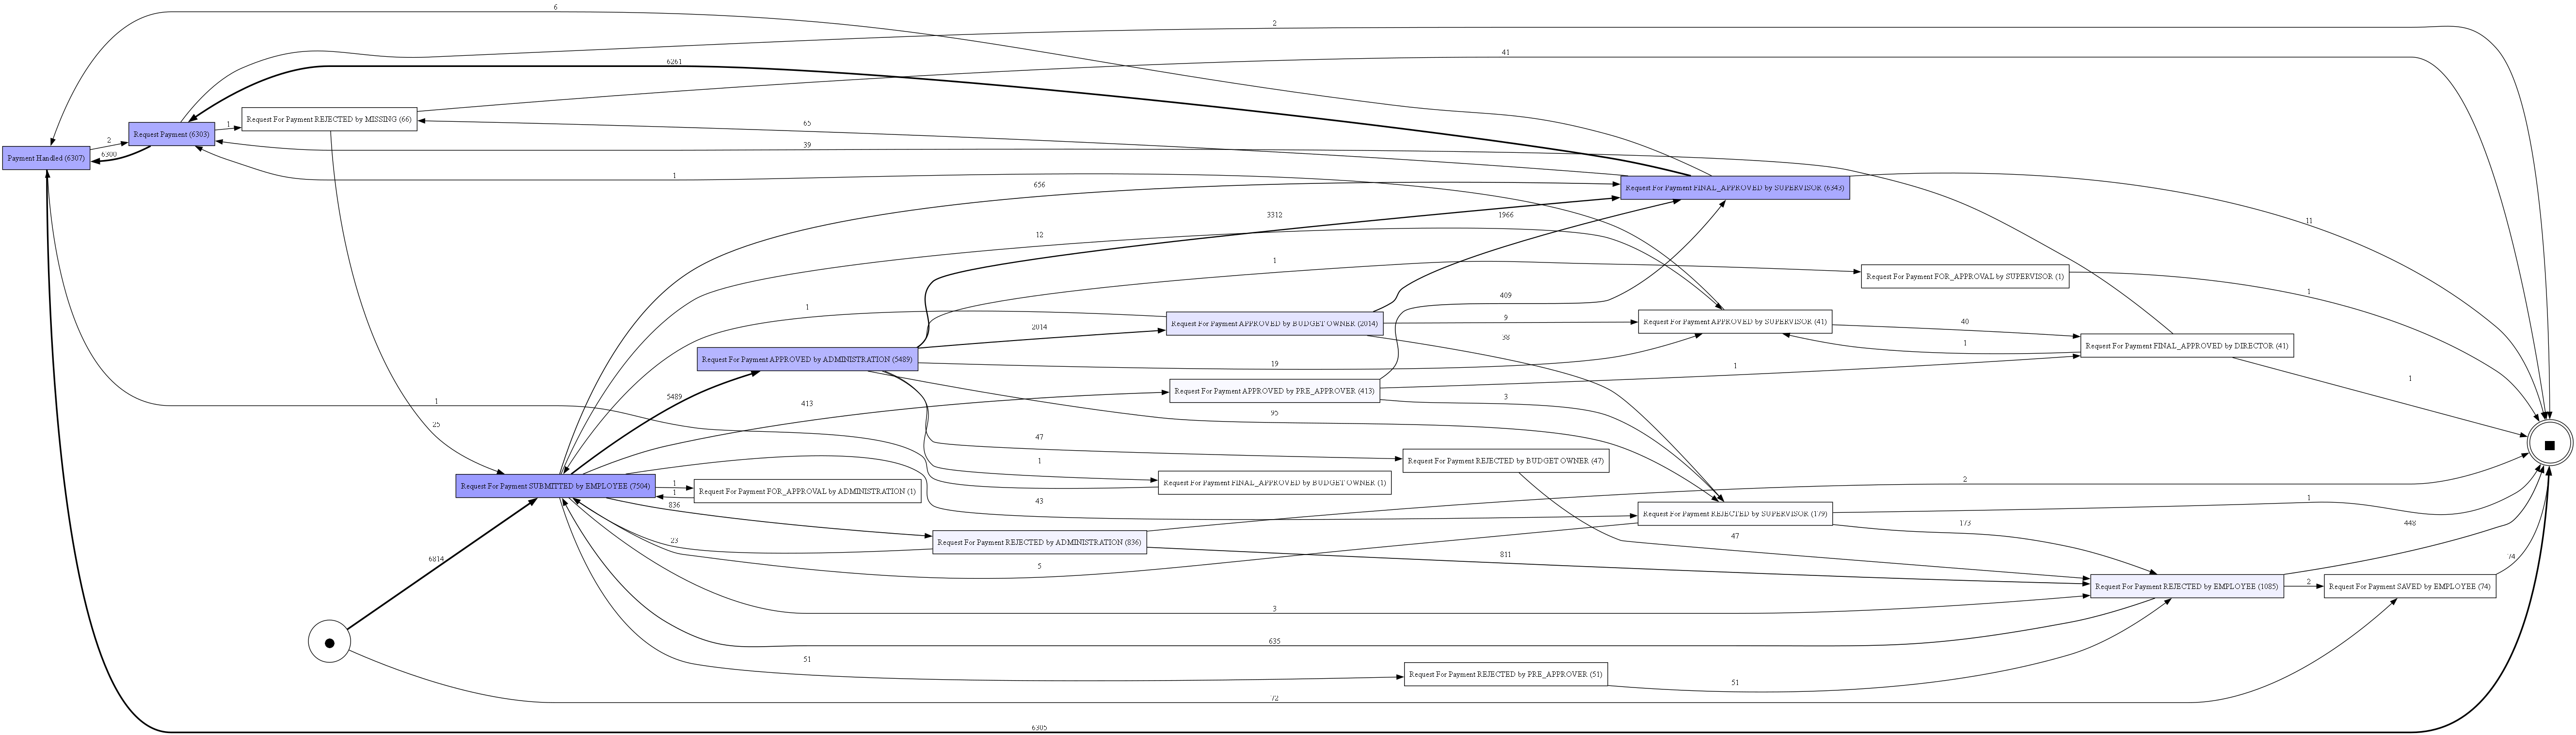

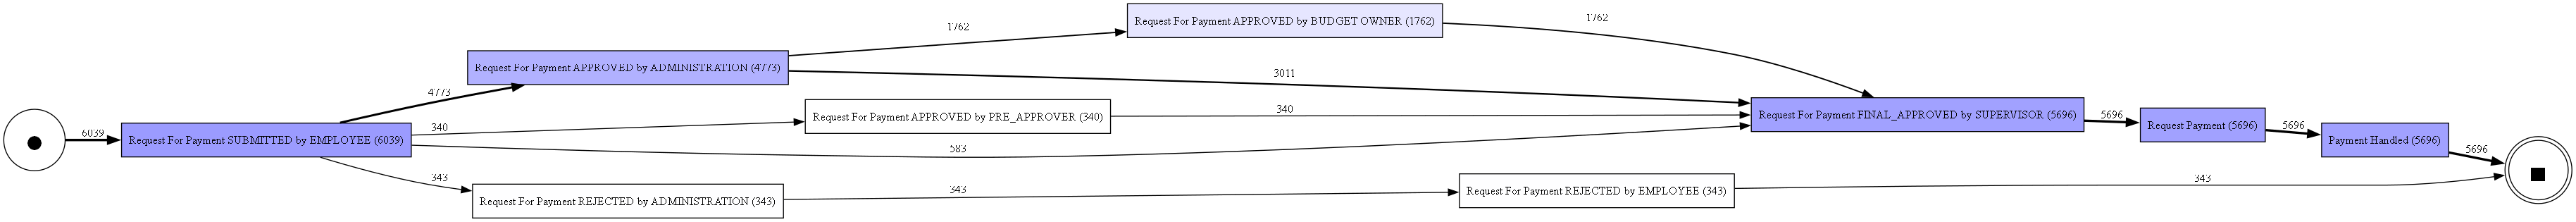

In [ ]:
# Directly Follows Graph (DFG)

# Create graph from original DF and visualise it
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)

# Create graph from filtered DF and visualise it
dfg, start_activities, end_activities = pm4py.discover_dfg(df_cleaned)
pm4py.view_dfg(dfg, start_activities, end_activities)

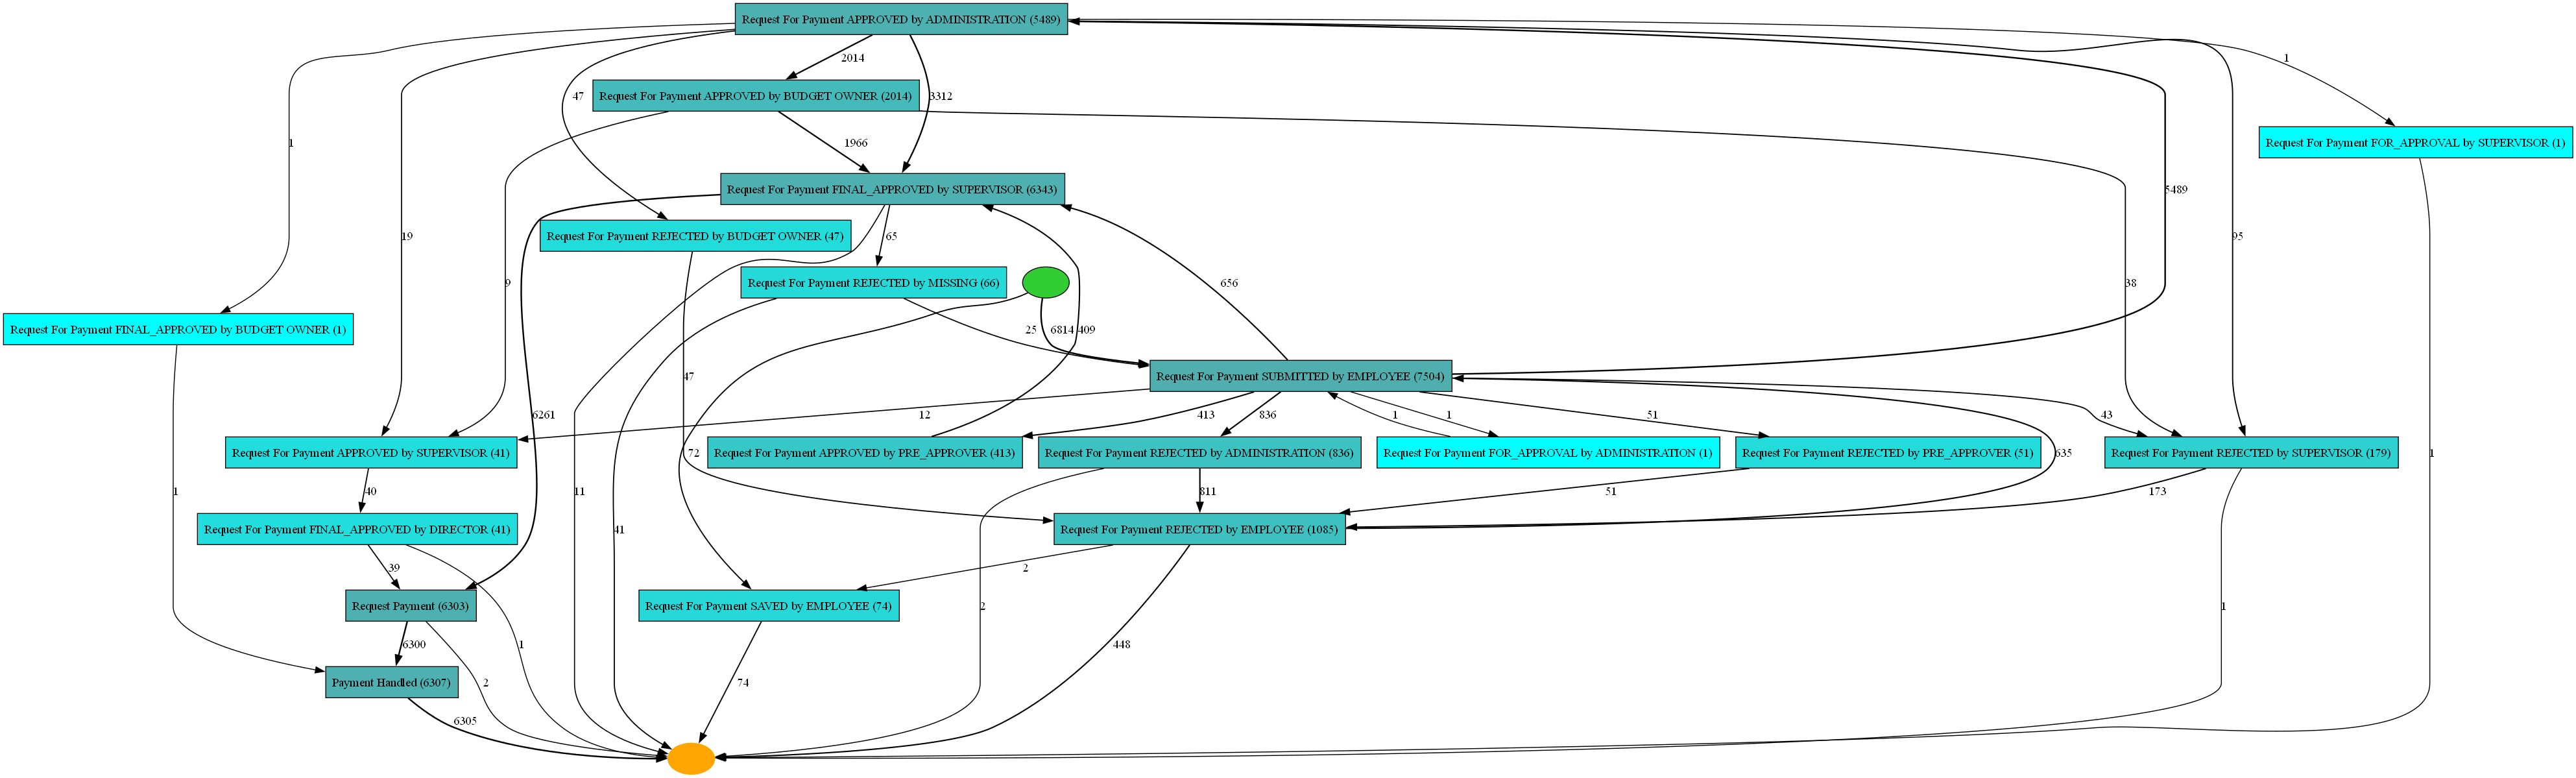

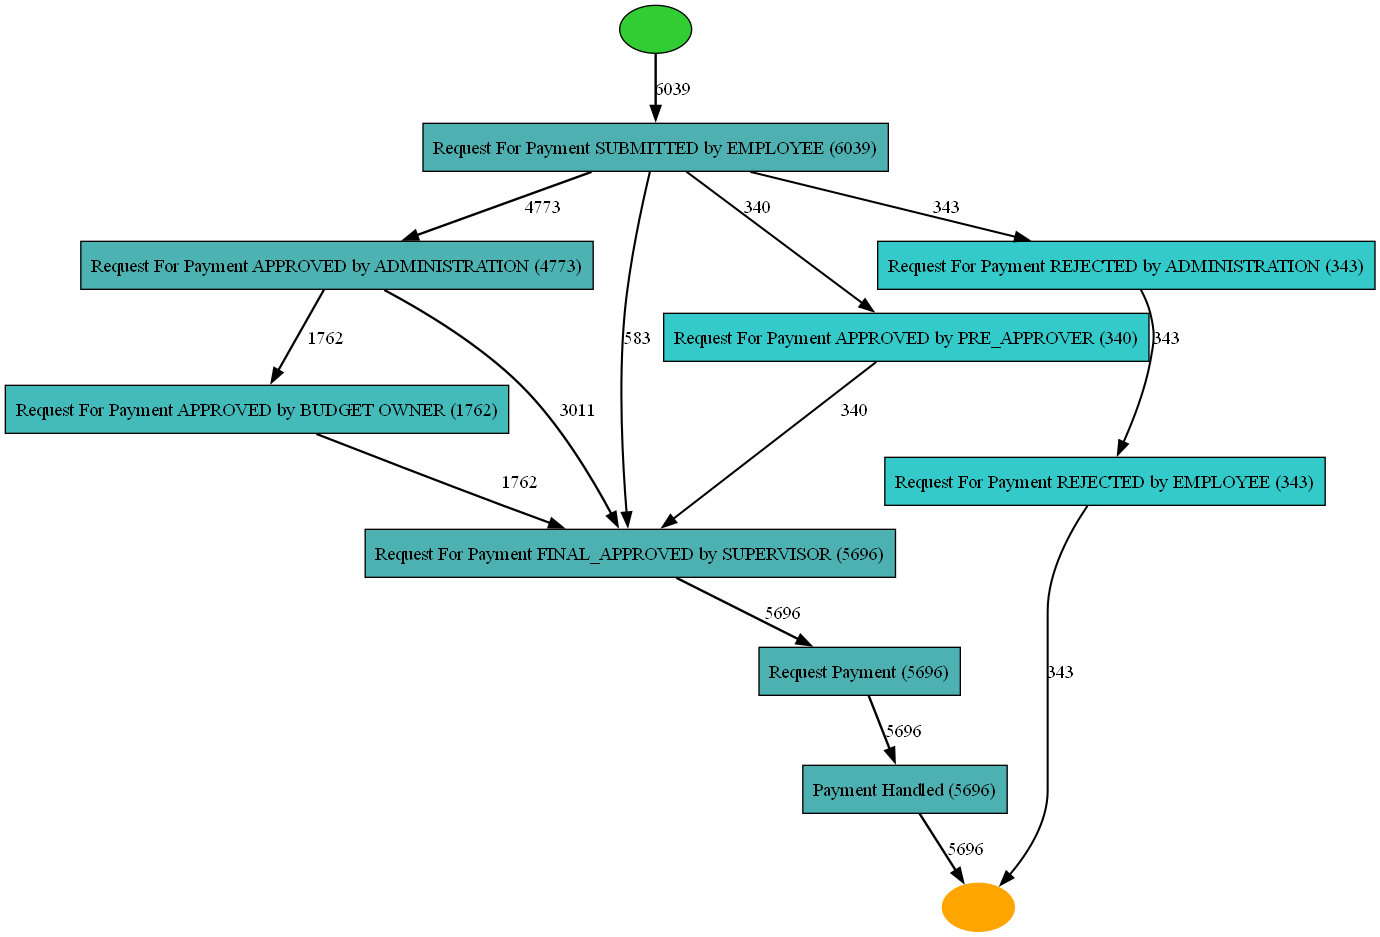

In [ ]:
# Heuristic Miner (HM)

# Discover the HM-map of the original DF and visualise it
map = pm4py.discover_heuristics_net(df)
pm4py.view_heuristics_net(map)

# Discover the HM-map of the filtered DF and visualise it
map = pm4py.discover_heuristics_net(df_cleaned)
pm4py.view_heuristics_net(map)

In [25]:
# Export the cleaned DataFrame to an XES file

"""
log_name_for_file = "RequestForPayments_cleaned.xes"
log = pm4py.convert_to_event_log(df_cleaned,
                                 case_id_key='case:id',
                                 activity_key='concept:name',
                                 timestamp_key='time:timestamp')

pm4py.write_xes(log, log_name_for_file)

print(f"Log succesfully exported in: {log_name_for_file}")
"""

'\nlog_name_for_file = "RequestForPayments_cleaned.xes"\nlog = pm4py.convert_to_event_log(df_cleaned,\n                                 case_id_key=\'case:id\',\n                                 activity_key=\'concept:name\',\n                                 timestamp_key=\'time:timestamp\')\n\npm4py.write_xes(log, log_name_for_file)\n\nprint(f"Log succesfully exported in: {log_name_for_file}")\n'